In [8]:
import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from glob import glob
import os
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision.models import resnet34
from scipy.spatial.distance import cdist
import numpy as np

In [37]:
ORI_IMG_DIR = './data/ori_img/' # original images
COR_IMG_DIR = './data/cor_img/' # corrected images

# Evaluate feature extraction

In [9]:
model = resnet34(pretrained=True)
model.fc = nn.Sequential()
model = model.to('cuda')
model.eval()
feature_extractor = model

In [28]:
def calc_dists(corrected=True):
        
    if corrected:
        img_dir = COR_IMG_DIR
    else:
        img_dir = ORI_IMG_DIR

    # Extract features
    dists = []

    for i in range(1, 11):
        print("Process class", i)
        class_path = os.path.join(img_dir, str(i))
        imgs = []
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            img = read_image(img_path) / 255
            imgs.append(img)
        imgs = torch.stack(imgs, dim=0)
        imgs = imgs.to('cuda')
        print("imgs.shape=", imgs.shape)
        batch_size = 64
        j = 0
        features = []
        while j < len(imgs):
            batch = imgs[j:j+batch_size]
            j += batch_size
            with torch.no_grad():
                ft = feature_extractor(batch).cpu().numpy()
            features.append(ft)
        features = np.concatenate(features, axis=0)
        print("features.shape=", features.shape)
        dist = cdist(features, features)
        print("dist.shape=", dist.shape)
        dists.append(dist)
        print()

    dists = np.stack(dists, axis=0)
    print("dists.shape=", dists.shape)

    return dists

In [29]:
ori_dists = calc_dists(corrected=False)
cor_dists = calc_dists(corrected=True)

Process class 1
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 2
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 3
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 4
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 5
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 6
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 7
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 8
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 9
imgs.shape= torch.Size([500, 3, 96, 96])
features.shape= (500, 512)
dist.shape= (500, 500)

Process class 10
imgs.shape=

In [35]:
def stat(dists):
    print("Mean distance of each class :\n", dists.mean(axis=(1, 2)))
    print("Mean distance of all classes :\n", dists.mean())
    print("Std distance of each class :\n", dists.std(axis=(1, 2)))
    print("Std distance of all classes :\n", dists.std())

stat(ori_dists)

Mean distance of each class :
 [37.11027478 51.6927212  39.07854619 44.63758483 45.5822327  54.2061232
 47.00189219 49.24412151 35.26808245 35.7767393 ]
Mean distance of all classes :
 43.9598318352235
Std distance of each class :
 [ 7.7916019   8.75943295  6.10300819  9.68070804  8.37992888 10.16967717
  7.91146952  9.80850423  7.38224127  6.42298987]
Std distance of all classes :
 10.558891106483436


In [36]:
stat(cor_dists)

Mean distance of each class :
 [36.26962435 50.16134433 38.10528963 43.12120242 44.65287496 52.56665949
 46.01150958 47.45294133 34.34925704 34.82984968]
Mean distance of all classes :
 42.75205528308204
Std distance of each class :
 [ 7.88163985  8.95650821  6.10219809  9.68581881  8.58536419 10.30632149
  8.10685667 10.0322449   7.24535378  6.44218422]
Std distance of all classes :
 10.480278455069342


# What's behind

In [50]:
from imageio import imread

def get_rand_imgs():
    indices = np.random.choice(5000, size=16, replace=False)

    imgs = []

    for i in indices:
        file1 = glob(os.path.join(ORI_IMG_DIR, f'*/{i}.png'))
        assert len(file1) == 1
        img1 = imread(file1[0])

        file2 = glob(os.path.join(COR_IMG_DIR, f'*/{i}.png'))
        assert len(file2) == 1
        img2 = imread(file2[0])

        imgs.append((img1, img2))

    return imgs


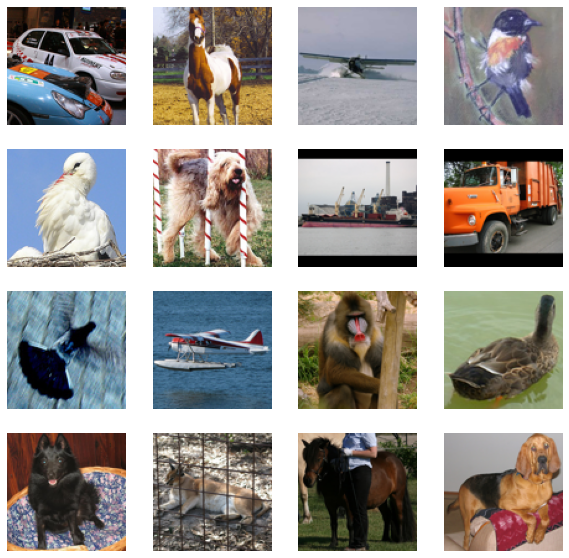

In [53]:
# Original images

imgs = get_rand_imgs()

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(imgs[i][0])
    plt.axis("off")
plt.show()

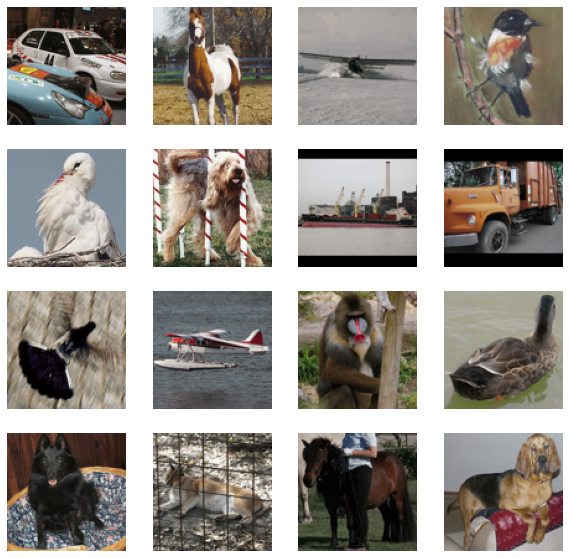

In [54]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(imgs[i][1])
    plt.axis("off")
plt.show()